# Class 10 - Starter Code

In [46]:
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics
from sklearn import linear_model
from sklearn import dummy

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

### Load Dataset and Pre-Process

In [47]:
# load data
df = pd.read_csv('../../assets/dataset/flight_delays.csv')

# check head
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,Unnamed: 15
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,900,855.0,0.0,NaN
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,900,856.0,0.0,NaN
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,1230,1226.0,0.0,NaN
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,1220,1214.0,0.0,NaN
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,1217302,32134,1305,1754.0,1.0,NaN


In [48]:
# drop all blank column
df = df.drop('Unnamed: 15', axis=1)

In [49]:
# drop missing values if there are any
if df.isnull().sum().sum():
    print "There are missing values"
    df = df.dropna()
    print "Missing values dropped"

There are missing values
Missing values dropped


In [50]:
# check data types
print df.dtypes

DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
FL_DATE                   object
UNIQUE_CARRIER            object
AIRLINE_ID                 int64
CARRIER                   object
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID      int64
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST_CITY_MARKET_ID        int64
CRS_DEP_TIME               int64
DEP_TIME                 float64
DEP_DEL15                float64
dtype: object


# Part 1: Visualizing models over variables

### 1.1 Visualize over Week and Time of Day

API Docs for [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [51]:
# create dummy variables for `DAY_OF_WEEK` feature
# this check allows this code to be run multiple times
if 'DAY_OF_WEEK' in df.columns:
    # get dummy variables for DAY_OF_WEEK
    df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='DAY_OF_WEEK'))
    # remove DAY_OF_WEEK column
    df.drop(['DAY_OF_WEEK'], axis=1, inplace=True)
    
# list of features to use to build model
features = [i for i in df.columns if 'DAY_OF_WEEK_' in i]
features += ['CRS_DEP_TIME']
print features

['DAY_OF_WEEK_1', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7', 'CRS_DEP_TIME']


In [52]:
# set X and y and build model
X = df[features]
y = df['DEP_DEL15']

# train model
lm = linear_model.LogisticRegression()
lm.fit(X, y)

# predict
df['probability'] = lm.predict_proba(X).T[1]

[(0.0, 0.0, 0.5, 1.0), (0.0, 0.1588235294117647, 1.0, 1.0), (0.0, 0.83333333333333337, 1.0, 1.0), (0.49019607843137247, 1.0, 0.47754585705249841, 1.0), (1.0, 0.9012345679012348, 0.0, 1.0), (1.0, 0.27668845315904156, 0.0, 1.0), (0.5, 0.0, 0.0, 1.0)]


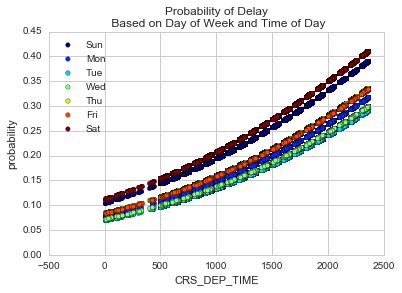

In [53]:
# plot
ax = plt.subplot(111)
labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
from matplotlib import cm
colors = [ cm.jet(x) for x in np.linspace(0, 1, len(labels)) ]
print colors

for i, v in enumerate(labels):
    df[df[features[i]] == 1].plot(
                                x='CRS_DEP_TIME', 
                                y='probability', 
                                kind='scatter', 
                                label=v, 
                                color=colors[i], 
                                ax=ax
                            )

ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day')
plt.legend(loc='upper left')

### 1.2 Visualizing over Airline Carrier

In [54]:
if 'CARRIER' in df.columns:
    # get dummy variables for CARRIER
    df = df.join(pd.get_dummies(df['CARRIER'], prefix='CARRIER'))
    # remove CARRIER column
    df.drop(['CARRIER'], axis=1, inplace=True)
    
# list of features to use to build model
features = [i for i in df.columns if 'CARRIER_' in i]
features += ['CRS_DEP_TIME']
print features

['CARRIER_AA', 'CARRIER_AS', 'CARRIER_B6', 'CARRIER_DL', 'CARRIER_EV', 'CARRIER_F9', 'CARRIER_HA', 'CARRIER_MQ', 'CARRIER_NK', 'CARRIER_OO', 'CARRIER_UA', 'CARRIER_US', 'CARRIER_VX', 'CARRIER_WN', 'CRS_DEP_TIME']


In [55]:
# set X and y and build model
X = df[features]
y = df['DEP_DEL15']

# train model
lm = linear_model.LogisticRegression()
lm.fit(X, y)

# predict
df['probability'] = lm.predict_proba(X).T[1]

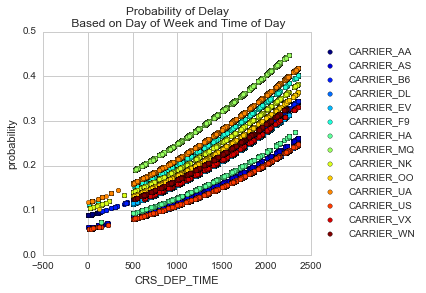

In [56]:
# plot
ax = plt.subplot(111)
labels = [i for i in df.columns if 'CARRIER_' in i]
from matplotlib import cm
colors = [cm.jet(x) for x in np.linspace(0, 1, len(labels))]

for i, v in enumerate(labels):
    df[df[features[i]] == 1].plot(
                                x='CRS_DEP_TIME', 
                                y='probability', 
                                kind='scatter', 
                                label=v, 
                                color=colors[i], 
                                ax=ax
                            )

ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Part 2: Visualizing Performance Against Baseline

### 2.1 Visualizing ROC Curves

API Docs for [sklearn.metrics.roc_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

In [57]:
# create dummy variables for `DAY_OF_WEEK` feature
# this check allows this code to be run multiple times
if 'DAY_OF_WEEK' in df.columns:
    # get dummy variables for DAY_OF_WEEK
    df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='DAY_OF_WEEK'))
    # remove DAY_OF_WEEK column
    df.drop(['DAY_OF_WEEK'], axis=1, inplace=True)
    
# list of features to use to build model
features = [i for i in df.columns if 'DAY_OF_WEEK_' in i]
features += ['CRS_DEP_TIME']
print features

['DAY_OF_WEEK_1', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7', 'CRS_DEP_TIME']


In [58]:
# set X and y and build model
X = df[features]
y = df['DEP_DEL15']

# train and predict using dummy model
dm = dummy.DummyClassifier()
dm.fit(X, y)
df['probability_dm'] = dm.predict_proba(X).T[1]

# train and predict using logistic model
lm = linear_model.LogisticRegression()
lm.fit(X, y)
df['probability_lm'] = lm.predict_proba(X).T[1]

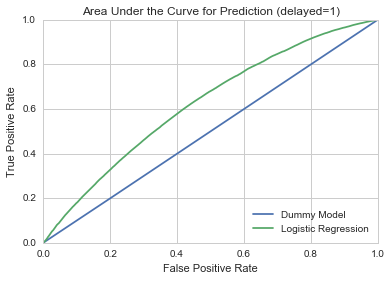

In [59]:
# plot ROC
ax = plt.subplot(111)
vals = metrics.roc_curve(df['DEP_DEL15'], df['probability_dm'])
ax.plot(vals[0], vals[1], label='Dummy Model')
vals = metrics.roc_curve(df['DEP_DEL15'], df['probability_lm'])
ax.plot(vals[0], vals[1], label='Logistic Regression')

ax.set(
    title='Area Under the Curve for Prediction (delayed=1)', 
    ylabel='True Positive Rate', 
    xlabel='False Positive Rate', 
    xlim=(0, 1), 
    ylim=(0, 1)
)
plt.legend(loc='lower right')

### 2.2 Visualizing Precision-Recall Curves

API Docs for [sklearn.metrics.precision_recall_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)

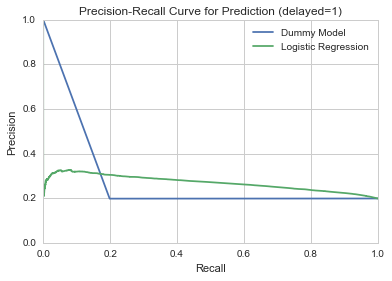

In [60]:
# plot precision-recall curve
ax = plt.subplot(111)
vals = metrics.precision_recall_curve(df['DEP_DEL15'], df['probability_dm'])
ax.plot(vals[1], vals[0], label='Dummy Model')
vals = metrics.precision_recall_curve(df['DEP_DEL15'], df['probability_lm'])
ax.plot(vals[1], vals[0], label='Logistic Regression')

ax.set(
    title='Precision-Recall Curve for Prediction (delayed=1)', 
    ylabel='Precision', 
    xlabel='Recall', 
    xlim=(0, 1), 
    ylim=(0, 1)
)
plt.legend(loc='upper right')

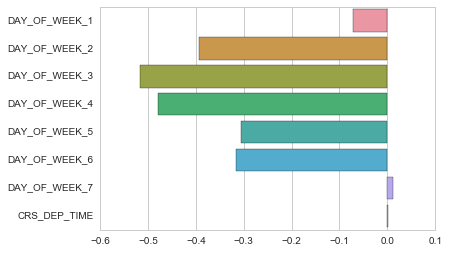

In [62]:
sns.barplot(y=features, x=lm.coef_[0])